In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pylab import *
import matplotlib
import plplot
from scipy import stats
#from io import StringIO
print(pd.__version__)
#AttributeError: 'Series' object has no attribute 'to_numpy'
import re

import math
import astropy as astro
import scipy.ndimage as spimage
from astropy.io import fits, ascii
from astropy.table import Table, join
from astropy.cosmology import WMAP9 as cosmo
import matplotlib as mpl
#from numpy import std as biweight_midvariance
import matplotlib.cm as cm

from scipy import optimize
from scipy.stats import gaussian_kde
from matplotlib import colors
import scipy.ndimage as ndimage
from collections import Counter
from matplotlib.legend import Legend
import matplotlib.patches as patches
from matplotlib import pyplot
#
#
#
import extinction


#
# seaborn
#
import pandas.util.testing as tm
import seaborn as sns

#
# Jorge
#

from sel2dhist_xy import sel2dhist_xy

#
# EDGE
#

from astropy import units as u
#import h5py 
#import edge_pydb.util as edgeutil
#from edge_pydb import EdgeTable
#from edge_pydb.xy2hist import xy2hist
#from edge_pydb.conversion import stmass_pc2, msd_co, ZOH_M13, bpt_type
#np.seterr(invalid='ignore')
#import edge_pydb.util as edgeutil
#edgeutil.listfiles()


#
# 3D plots!
#
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#biweight_midvariance


import warnings
warnings.simplefilter("ignore")

#
# my_utils
#
from my_utils import *

#
#
#
from ndtest import *


1.1.1
1.1.1


<ipython-input-1-ea306c5d64ce>:40: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#
def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.85,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='Wistia_r', cm_r='Wistia', title='', fit_title='', if_contour=1, if_scatter=1, if_bin=1, if_plot=0, max_c=0.95, Delta=0.15):
#def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.95,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='YlOrRd_r', cm_r='YlOrRd', title='', fit_title='', if_contour=1, if_scatter=1, if_bin=1):
#def my_scatter_single(ax,x_par,y_par,c_par,x_min,x_max,y_min,y_max,c_min,c_max,x_label,y_label,xf_min=0.0,yf_min=0.0,den_par_min=0.95,bin_size=0.3,bin_number=2,c_color="black",c_color2="white",error=0.05,MC=10,cm='YlOrRd_r', cm_r='YlOrRd', title='', fit_title=''):
#    cm = califa_vel_r
#    cm='Wistia_r'
    if (xf_min==0.0):
        xf_min=x_min
    if (yf_min==0.0):
        yf_min=y_min
#    MC=5
#    error=0.05
    N_min=2
#    Delta=0.15
#    den_par_min=0.9
    nbins=60
    lEW_cut=0.78 #0.78
    n_obj_org=len(x_par)
    mask = x_par>-20
    n_obj=len(x_par[mask])
    mask_SFGs = mask & (c_par>lEW_cut)
    #
    # Density near a point
    #
    x_plt, y_plt = x_par[mask_SFGs], y_par[mask_SFGs]
    n_sf=len(x_par[mask_SFGs])
    #    nbins=40
    counts, xbins, ybins = np.histogram2d(x_plt, y_plt, bins=nbins,
        normed=True,
        range=[[np.nanmin(x_plt),np.nanmax(x_plt)],[np.nanmin(y_plt),np.nanmax(y_plt)]])
                                            #    counts /= counts.max()
#    print(xbins,ybins)
    counts=ndimage.gaussian_filter(counts, sigma=1, order=0)
    counts /= counts.max()
    sum_total=counts.sum()
    vals_new=[]
    levels_new=[]
    for idx,cuts in enumerate(np.arange(0.00,1.0,0.01)):
        mask_now= counts>cuts
        levels_new.append(cuts)
        vals_new.append(counts[mask_now].sum()/sum_total)
        #print(idx,levels[idx],vals[idx])
    vals_cont=np.array([max_c,0.80,0.40,-0.01])
    levels_cont=np.interp(vals_cont,np.array(levels_new),np.array(vals_new))
    
#    figure=ax.scatter(x_par, y_par, c=c_par, vmin=c_min,vmax=c_max,alpha=0.4,edgecolor='none',cmap=cm)
    counts_rot=np.rot90(counts,3)
    xbins=xbins+0.5*(x_max-x_min)/nbins
    ybins=ybins+0.5*(y_max-y_min)/nbins
    flip_counts_rot=np.fliplr(counts_rot)
    
  
    den_par=np.zeros(len(x_par))
    for i in range(len(x_par)):
        den_par[i]=1.0
        if ((np.isfinite(x_par[i])) and (np.isfinite(y_par[i]))):
            i_x=np.argmin(np.abs(xbins-x_par[i]))
            i_y=np.argmin(np.abs(ybins-y_par[i]))
            if ((i_x>0) and (i_x<nbins) and (i_y>0) and (i_y<nbins)):
                den_par[i]=np.interp(counts[i_x,i_y],np.array(levels_new),np.array(vals_new))



    if (if_scatter==1):
        figure=ax.scatter(x_par, y_par, s=10, c=den_par,\
                          vmin=0,vmax=1,alpha=0.25,edgecolor='lightyellow',cmap=cm,\
                          rasterized=True,label=title)
        figure=ax.scatter(x_par, y_par, s=12, c=den_par,\
                          vmin=0,vmax=1,alpha=0.25,edgecolor='none',cmap=cm,\
                          rasterized=True)

    if (if_contour==1):
        p_cont2=ax.contourf(xbins[0:nbins],ybins[0:nbins],flip_counts_rot,\
                             levels_cont,cmap=cm_r,alpha=0.8,linewidths=2)
#        p_cont2=ax.contour(xbins[0:nbins],ybins[0:nbins],flip_counts_rot,\
#                           levels_cont,cmap=cm_r,alpha=0.8,linewidths=2)



#
# We mask low density points
#
#    print("# den_par_min=",den_par_min)
    mask_SFGs = mask_SFGs & (den_par<den_par_min) & \
    np.logical_not(np.isnan(x_par)) & np.isfinite(x_par) & \
    np.logical_not(np.isnan(y_par)) & np.isfinite(y_par)  

    x_sf=x_par[mask_SFGs]
    y_sf=y_par[mask_SFGs]
    
#    figure=ax.scatter(x_par, y_par, c=den_par, vmin=0,vmax=1,alpha=0.4,edgecolor='none',cmap=cm)
    
    bin1 , min1 , max1= Delta,x_min,x_max
    m1, sM1, sD1 = binning_M(x_sf, y_sf, bin1 , min1 , max1, N_min, bin_size, bin_number )
    if (if_bin==1):
        p1 = ax.errorbar(m1, sM1, yerr= sD1, markersize = 10,\
                         markerfacecolor =c_color2, markeredgecolor = 'black', \
                         fmt = 'o', ecolor='black', elinewidth = 1, label = '', zorder=2, alpha=1.0)


#    x_sf=x_par[mask_SFGs]
#    y_sf=y_par[mask_SFGs]
    bin1 , min1 , max1= Delta,xf_min,x_max
    funct    = lambda x,a,b: a + b * x
    START=[-1,1.0]
    pa1=np.zeros(2)
    ea1=np.zeros(2)
#    print('#vals to fit =',m1,sM1,sD1)
    if m1.size > 2:
        m1, sM1, sD1 = binning_M(x_sf, y_sf, bin1 , min1 , max1, N_min, 0.3,2 )
        pa1, ea1  = optimize.curve_fit(funct, m1, sM1, sigma=np.sqrt(sD1), p0 = START )
        a_pa=np.zeros((MC,2))
        a_ea=np.zeros((MC,2,2))
        a_rc=np.zeros((MC,2,2))
        for iMC in range(MC):
            e_x_sf=np.abs(2*error-error*(x_sf-x_min)/(x_max-x_min))
            e_y_sf=np.abs(2*error-error*(y_sf-y_min)/(y_max-y_min))
            
#            print('e_y=',e_y_sf,len(e_y_sf))
#            print('e-x=',e_x_sf,len(e_x_sf))
            x_sf_now=x_sf+np.random.normal(loc=0.0,scale=e_x_sf,size=len(e_x_sf))
            y_sf_now=y_sf+np.random.normal(loc=0.0,scale=e_y_sf,size=len(e_y_sf))
            mNOW, sMNOW, sDNOW = binning_M(x_sf_now, y_sf_now, bin1 , min1 , max1, N_min, 0.3,2 )
            rcNOW=np.corrcoef(x_sf_now, y_sf_now)            
            paNOW, eaNOW  = optimize.curve_fit(funct, mNOW, sMNOW, sigma=np.sqrt(sDNOW), p0 = START )
#            print('Coeffs lin fit: ',round(paNOW[0],3),round(np.sqrt(np.diag(eaNOW))[0],3),round(paNOW[1],3),round(np.sqrt(np.diag(eaNOW))[1],3),round(rcNOW[0,1],3))    
            a_pa[iMC,:]=paNOW
            a_ea[iMC,:,:]=eaNOW
            a_rc[iMC,:,:]=rcNOW
#        print(pa1,ea1)
#        test=np.mean(a_pa,axis=(0,1))
#        print(test)
        np.mean(a_pa, axis=(0), out=pa1)
        np.mean(a_ea, axis=(0), out=ea1)
        e_pa1=np.std(a_pa, axis=(0))
        rc=np.mean(a_rc, axis=(0))
        ea1[0,0]=ea1[0,0]+e_pa1[0]
        ea1[1,1]=ea1[1,1]+e_pa1[1]
        
        
        #        pa1=a_pa.mean(axis=(1,2))
#        ea1=a_ea.mean(axis=(1,2))
#        ea1=np.mean(a_ea,axis=2)
        
#        pa1, ea1  = optimize.curve_fit(funct, m1, sM1, sigma=sD1, p0 = START )
#round(pa1[0],3),round(np.sqrt(np.diag(ea1))[0],3),round(pa1[1],3),round(np.sqrt(np.diag(ea1))[1],3),round(rc[0,1],3)

        if (xf_min!=x_min):
            yl_plot=np.linspace(y_min,y_max,10)
            xl_plot=xf_min+0.0*yl_plot
            rect=patches.Rectangle((x_min, y_min), xf_min-x_min, y_max-y_min, facecolor="black", alpha=0.05,zorder=3)
            ax.add_patch(rect)
#        x_plot=np.linspace(np.min(m1)-1.5*bin1, np.max(m1)+1.5*bin1, 10)
        x_plot=np.linspace(xf_min-0.15*(x_max-x_min), x_max-0.15*(x_max-x_min), 10)
        y_plot=funct(x_plot,pa1[0],pa1[1])
        if (if_plot==1):
            p_fit, =ax.plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor =c_color  ,\
                            color =c_color, zorder=3, alpha=0.8)

        
#        p_fit=ax.plot(xl_plot, yl_plot, '-', linewidth = 2, markerfacecolor ='grey'  , color ='grey', zorder=2)        
#        print("PASO")
    mask_x_sf=x_sf>xf_min
    x_sf=x_sf[mask_x_sf]
    y_sf=y_sf[mask_x_sf]
    rc=np.corrcoef(x_sf, y_sf)
    delta_y_par=y_sf-(pa1[0]+pa1[1]*x_sf)
    s_y_par = biweight_midvariance(y_sf[np.isfinite(y_sf)])
    s_dy_par = biweight_midvariance(delta_y_par[np.isfinite(delta_y_par)])

    print('Mean Coeff.: ',round(pa1[0],3),round(np.sqrt(np.diag(ea1))[0],3),round(pa1[1],3),round(np.sqrt(np.diag(ea1))[1],3),round(rc[0,1],3),round(s_y_par,3),round(s_dy_par,3),n_obj,n_sf)
    #    print('Stddev: ',round(s_y_par,3),round(s_dy_par,3))
    #     if (if_contour==1):
    if ((len(title)>0) and (if_contour==1)):
        p_cont2.collections[0].set_label(title)
    if ((len(fit_title)>0) and (if_plot==1)):
        p_fit.set_label(fit_title)

#    p_cont2.collections[0].set_label(title)        
    ax.set_xlim([x_min,x_max])
    ax.set_ylim([y_min,y_max])    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.minorticks_on()
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    ax.tick_params(which='both',direction="in")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    return pa1,ea1,s_y_par,s_dy_par,rc





Mean Coeff.:  -9.884 0.163 0.941 0.165 0.909 0.598 0.249 10000 10000
Mean Coeff.:  -0.032 0.137 0.009 0.11 0.028 0.239 0.239 10000 10000
Mean Coeff.:  1.458 0.342 0.168 0.112 0.422 0.238 0.216 10000 10000
Mean Coeff.:  -0.862 0.235 0.92 0.176 0.918 0.583 0.231 10000 10000
Mean Coeff.:  0.294 0.162 0.303 0.158 0.276 0.24 0.231 10000 10000
Mean Coeff.:  4.629 0.704 0.518 0.22 0.637 0.239 0.185 10000 10000


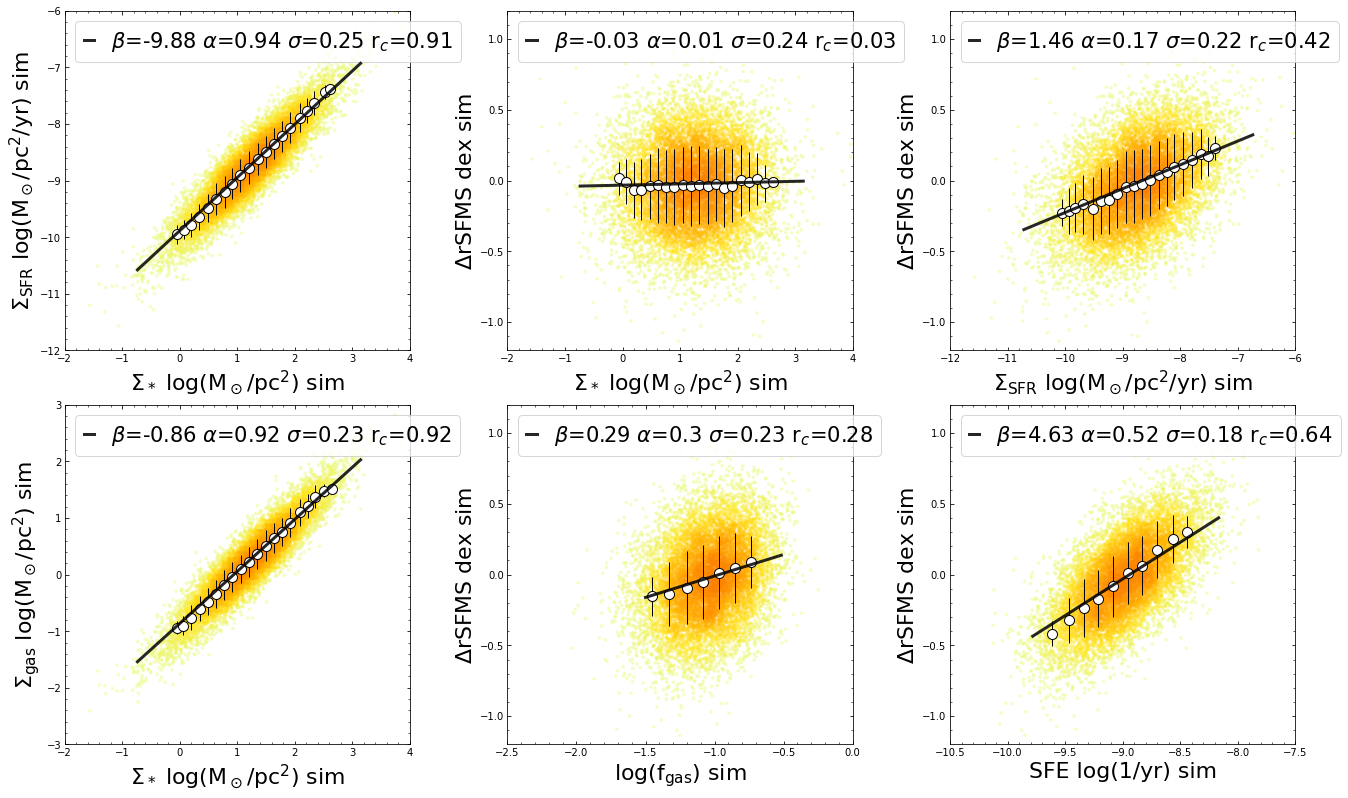

In [3]:
# Simulating relations and scales

#
# BEST FITTED RELATION USED TO DEFINE THE DELTA!!!
#


n = 10000
a = 1.0
b = -10
a_g = 1.0
b_g = -1.0
e_x = 0.15
e_y = 0.25
#e_x = 0.20
#e_y = 0.20


#x = np.linspace(-1,3.5,n)
x = 0.5*(3.5-1)+0.15*(3.5+1)*np.random.standard_normal(n)
y = a*x + b
x_gas = a_g*x+b_g
EW = 1.0 + 0.0*x

x = x + e_x*np.random.standard_normal(n)
y = y + e_y*np.random.standard_normal(n) #+ (a*e_x+b)*np.random.standard_normal(n) 
x_gas = x_gas + 1.5*e_x*np.random.standard_normal(n) #+ (a_g*e_x+b_g)*np.random.standard_normal(n) 


fig, ax = plt.subplots(2,3,figsize=(18.5,11))

######
pa1,ea1,s_y_par,s_dy_par,rc=my_scatter_single(ax[0][0],\
                                              x,\
                                              y,\
                                              EW,\
                                              -2,4,\
                                              -2-10,4-10,0.78-2,0.78+3,'',\
                                              '',-2,title='', fit_title='TW',\
                                             if_contour=0, if_bin=1, if_scatter=1, max_c=0.95,den_par_min=0.85)
x_min=np.min(x)
x_max=np.max(x)
x_plot=np.linspace(x_min+0.15*(x_max-x_min),x_max-0.15*(x_max-x_min),50)
y_plot=pa1[0]+pa1[1]*x_plot
fact=1.0
l_b=np.round(pa1[0],2)
l_a=np.round(pa1[1],2)
r_now=rc[0,1]
l_r=np.round(r_now,2)
l_s=np.round(s_dy_par*fact,2)
label=r'$\beta$='+str(l_b)+' '+r'$\alpha$='+str(l_a)+' '+r'$\sigma$='+str(l_s)+' '+r'r$_c$='+str(l_r)
p_fit, =ax[0][0].plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor ='black'  , color ='black', zorder=10,label=label,alpha=0.85)


d_y = y- (pa1[0] + pa1[1]*x)
#d_y = y- (a*x+b)

pa2,ea2,s_y_par2,s_dy_par2,rc2=my_scatter_single(ax[0][1],
                                                 x,\
                                              d_y,\
                                              EW,\
                                              -2,4,\
                                              -1.2,1.2,0.78-2,0.78+3,'',\
                                              '',-2,title='', fit_title='TW',\
                                             if_contour=0, if_bin=1, if_scatter=1, max_c=0.95,den_par_min=0.85)


######################
y_plot=pa2[0]+pa2[1]*x_plot
fact=1
l_b=np.round(pa2[0],2)
l_a=np.round(pa2[1],2)
r_now=rc2[0,1]
l_r=np.round(r_now,2)
l_s=np.round(s_dy_par2*fact,2)
label=r'$\beta$='+str(l_b)+' '+r'$\alpha$='+str(l_a)+' '+r'$\sigma$='+str(l_s)+' '+r'r$_c$='+str(l_r)
######################
p_fit, =ax[0][1].plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor ='black'  , color ='black', zorder=10,label=label,alpha=0.85)




pa2,ea2,s_y_par2,s_dy_par2,rc2=my_scatter_single(ax[0][2],
                                                 y,\
                                              d_y,\
                                              EW,\
                                              -2-10,4-10,\
                                              -1.2,1.2,0.78-2,0.78+3,'',\
                                              '',-2-10,title='', fit_title='TW',\
                                             if_contour=0, if_bin=1, if_scatter=1, max_c=0.95,den_par_min=0.85)

x_min=np.min(y)
x_max=np.max(y)
x_plot=np.linspace(x_min+0.15*(x_max-x_min),x_max-0.15*(x_max-x_min),50)
######################
y_plot=pa2[0]+pa2[1]*x_plot
fact=1
l_b=np.round(pa2[0],2)
l_a=np.round(pa2[1],2)
r_now=rc2[0,1]
l_r=np.round(r_now,2)
l_s=np.round(s_dy_par2*fact,2)
label=r'$\beta$='+str(l_b)+' '+r'$\alpha$='+str(l_a)+' '+r'$\sigma$='+str(l_s)+' '+r'r$_c$='+str(l_r)
######################
p_fit, =ax[0][2].plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor ='black'  , color ='black', zorder=10,label=label,alpha=0.85)




######
pa1,ea1,s_y_par,s_dy_par,rc=my_scatter_single(ax[1][0],\
                                              x,\
                                              x_gas,\
                                              EW,\
                                              -2,4,\
                                              -4+1,2+1,0.78-2,0.78+3,'',\
                                              '',-2,title='', fit_title='TW',\
                                             if_contour=0, if_bin=1, if_scatter=1, max_c=0.95,den_par_min=0.85)
x_min=np.min(x)
x_max=np.max(x)
x_plot=np.linspace(x_min+0.15*(x_max-x_min),x_max-0.15*(x_max-x_min),50)
y_plot=pa1[0]+pa1[1]*x_plot
fact=1.0
l_b=np.round(pa1[0],2)
l_a=np.round(pa1[1],2)
r_now=rc[0,1]
l_r=np.round(r_now,2)
l_s=np.round(s_dy_par*fact,2)
label=r'$\beta$='+str(l_b)+' '+r'$\alpha$='+str(l_a)+' '+r'$\sigma$='+str(l_s)+' '+r'r$_c$='+str(l_r)
p_fit, =ax[1][0].plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor ='black'  , color ='black', zorder=10,label=label,alpha=0.85)


d_x_gas = x_gas- (pa1[0] + pa1[1]*x)
#d_y = y- (a*x+b)
f_gas = 10**(x_gas)/(10**x_gas+10**x)
l_f_gas = np.log10(f_gas)
pa2,ea2,s_y_par2,s_dy_par2,rc2=my_scatter_single(ax[1][1],l_f_gas,d_y,\
                                                 EW,\
                                                 -3.5+1,0,\
                                                 -1.2,1.2,0.78-2,0.78+3,'',\
                                                 '',-3.5+1,title='', fit_title='TW',\
                                                 if_contour=0, if_bin=1, if_scatter=1,\
                                                 max_c=0.95,den_par_min=0.85)

#x_gas-x,\

x_min=np.min(l_f_gas)#x_gas-x)
x_max=np.max(l_f_gas)#
x_plot=np.linspace(x_min+0.3*(x_max-x_min),x_max-0.15*(x_max-x_min),50)
######################
y_plot=pa2[0]+pa2[1]*x_plot
fact=1
l_b=np.round(pa2[0],2)
l_a=np.round(pa2[1],2)
r_now=rc2[0,1]
l_r=np.round(r_now,2)
l_s=np.round(s_dy_par2*fact,2)
label=r'$\beta$='+str(l_b)+' '+r'$\alpha$='+str(l_a)+' '+r'$\sigma$='+str(l_s)+' '+r'r$_c$='+str(l_r)
######################
p_fit, =ax[1][1].plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor ='black'  , color ='black', zorder=10,label=label,alpha=0.85)



pa2,ea2,s_y_par2,s_dy_par2,rc2=my_scatter_single(ax[1][2],\
                                                 y-x_gas,d_y,\
                                                 EW,\
                                                 -9.5-1,-6.5-1,\
                                                 -1.2,1.2,0.78-2,0.78+3,'',\
                                                 '',-10-1,title='', fit_title='TW',\
                                                 if_contour=0, if_bin=1, if_scatter=1,\
                                                 max_c=0.95,den_par_min=0.85)



x_min=np.min(y-x_gas)
x_max=np.max(y-x_gas)
x_plot=np.linspace(x_min+0.15*(x_max-x_min),x_max-0.15*(x_max-x_min),50)
######################
y_plot=pa2[0]+pa2[1]*x_plot
fact=1
l_b=np.round(pa2[0],2)
l_a=np.round(pa2[1],2)
r_now=rc2[0,1]
l_r=np.round(r_now,2)
l_s=np.round(s_dy_par2*fact,2)
label=r'$\beta$='+str(l_b)+' '+r'$\alpha$='+str(l_a)+' '+r'$\sigma$='+str(l_s)+' '+r'r$_c$='+str(l_r)
######################
p_fit, =ax[1][2].plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor ='black'  , color ='black', zorder=10,label=label,alpha=0.85)


sS_Mst_label=r'$\Sigma_*$ log(M$_\odot$/pc$^2$) sim'
sS_Mgas_label=r'$\Sigma_{\rm gas}$ log(M$_\odot$/pc$^2$) sim'
sS_SFR_label=r'$\Sigma_{\rm SFR}$ log(M$_\odot$/pc$^2$/yr) sim'

sD_rSFMS_label=r'$\Delta$rSFMS dex sim' #log(M$_\odot$/pc$^2$/yr)'
sD_rMGMS_label=r'$\Delta$rMGMS dex sim' #log(M$_\odot$/pc$^2$)'
sD_rSK_label=r'$\Delta$rSK dex sim' #log(M$_\odot$/pc$^2$/yr)'

ax[0][0].set_xlabel(sS_Mst_label, fontsize=22)
ax[0][0].set_ylabel(sS_SFR_label, fontsize=22)
ax[0][1].set_xlabel(sS_Mst_label, fontsize=22)
ax[0][1].set_ylabel(sD_rSFMS_label, fontsize=22)
ax[0][2].set_xlabel(sS_SFR_label, fontsize=22)
ax[0][2].set_ylabel(sD_rSFMS_label, fontsize=22)
ax[1][0].set_xlabel(sS_Mst_label, fontsize=22)
ax[1][0].set_ylabel(sS_Mgas_label, fontsize=22)
ax[1][1].set_xlabel(r'log(f$_{\rm gas}$) sim', fontsize=22)
ax[1][1].set_ylabel(sD_rSFMS_label, fontsize=22)
ax[1][2].set_xlabel(r'SFE log(1/yr) sim', fontsize=22)
ax[1][2].set_ylabel(sD_rSFMS_label, fontsize=22)

#ax[0][0].set_xlabel('X', fontsize=22)
#ax[0][0].set_ylabel('Y', fontsize=22)
#ax[0][1].set_xlabel('X', fontsize=22)
#ax[0][1].set_ylabel(r'$\Delta$Y', fontsize=22)
#ax[0][2].set_xlabel('Y', fontsize=22)
#ax[0][2].set_ylabel(r'$\Delta$Y', fontsize=22)
#ax[1][0].set_xlabel('X', fontsize=22)
#ax[1][0].set_ylabel(r"X'", fontsize=22)
#ax[1][1].set_xlabel(r"X'-X", fontsize=22)
#ax[1][1].set_ylabel(r'$\Delta$Y', fontsize=22)
#ax[1][2].set_xlabel(r"Y-X'", fontsize=22)
#ax[1][2].set_ylabel(r'$\Delta$Y', fontsize=22)



for i,ax_now in enumerate(ax.flat):
    #print (i)
    ax_now.minorticks_on()
    ax_now.xaxis.set_ticks_position('both')
    ax_now.yaxis.set_ticks_position('both')
    ax_now.tick_params(which='both',direction="in")
    ax_now.spines['right'].set_visible(True);
    ax_now.spines['top'].set_visible(True)
    ax_now.legend(loc='upper left', handlelength=0.5, frameon='True',\
                           columnspacing=0.3, fontsize=21)#, bbox_to_anchor=(0.01, 0.5, 0.15, 0.5    
fig.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95, wspace=0, hspace=0) 
fig.tight_layout(pad=0.4)
#fig.colorbar()
#cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
#cbar = fig.colorbar(cax=cb_ax)

fig.savefig("sim_test.pdf", transparent=False, facecolor='white', CALcolor='white')#.pdf")




Mean Coeff.:  -9.891 0.191 0.929 0.151 0.909 0.594 0.248 10000 10000
Mean Coeff.:  0.063 0.17 -0.04 0.131 -0.088 0.238 0.237 10000 10000
Mean Coeff.:  1.192 0.313 0.136 0.101 0.315 0.239 0.227 10000 10000
Mean Coeff.:  -0.877 0.227 0.915 0.154 0.92 0.588 0.232 10000 10000
Mean Coeff.:  0.364 0.248 0.339 0.241 0.275 0.24 0.231 10000 10000
Mean Coeff.:  4.667 0.596 0.515 0.193 0.642 0.24 0.185 10000 10000


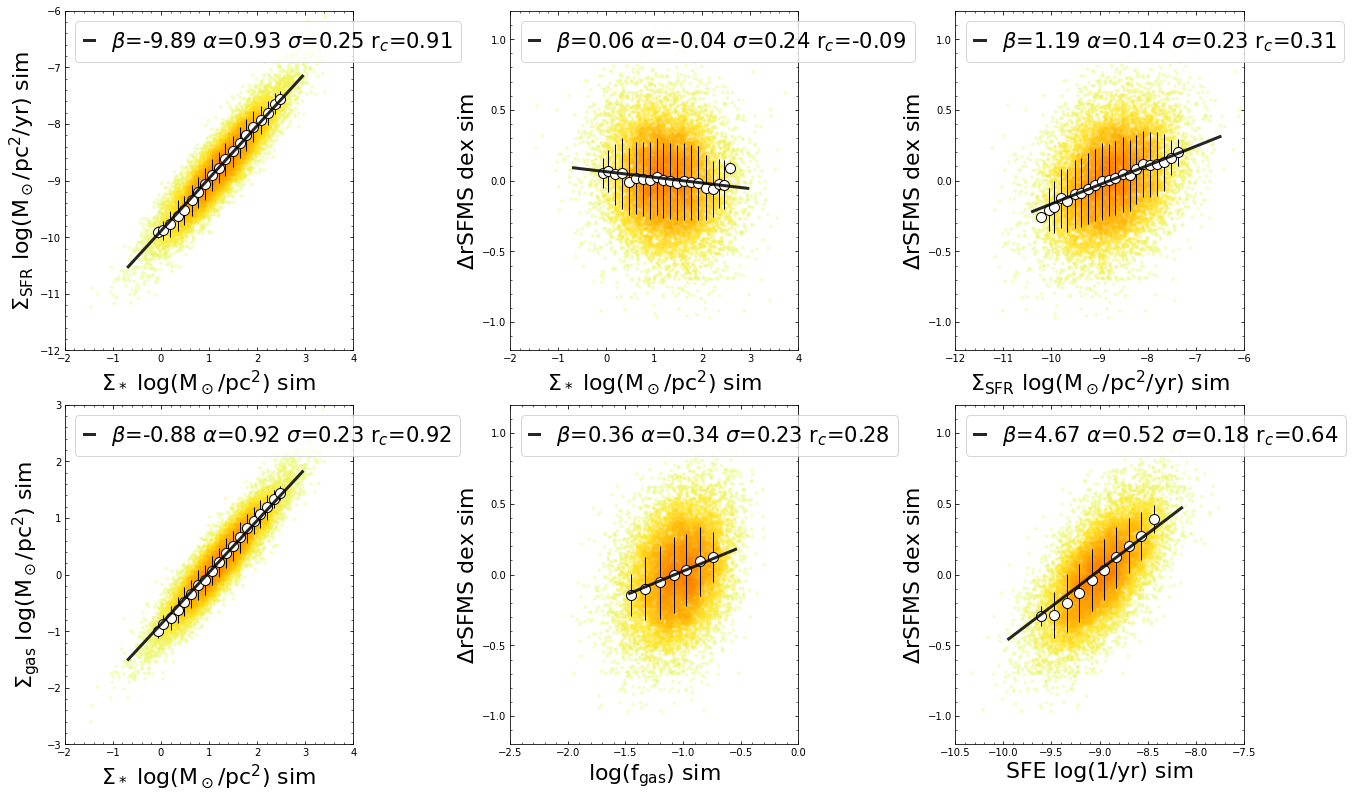

In [4]:
# Simulating relations and scales

#
# INPUT PARAMETERS USED TO DEFINE THE DELTA_X!
#


n = 10000
a = 1.0
b = -10
a_g = 1.0
b_g = -1.0
e_x = 0.15
e_y = 0.25
#e_x = 0.20
#e_y = 0.20


#x = np.linspace(-1,3.5,n)
x = 0.5*(3.5-1)+0.15*(3.5+1)*np.random.standard_normal(n)
y = a*x + b
x_gas = a_g*x+b_g
EW = 1.0 + 0.0*x

x = x + e_x*np.random.standard_normal(n)
y = y + e_y*np.random.standard_normal(n) #+ (a*e_x+b)*np.random.standard_normal(n) 
x_gas = x_gas + 1.5*e_x*np.random.standard_normal(n) #+ (a_g*e_x+b_g)*np.random.standard_normal(n) 


fig, ax = plt.subplots(2,3,figsize=(18.5,11))

######
pa1,ea1,s_y_par,s_dy_par,rc=my_scatter_single(ax[0][0],\
                                              x,\
                                              y,\
                                              EW,\
                                              -2,4,\
                                              -2-10,4-10,0.78-2,0.78+3,'',\
                                              '',-2,title='', fit_title='TW',\
                                             if_contour=0, if_bin=1, if_scatter=1, max_c=0.95,den_par_min=0.85)
x_min=np.min(x)
x_max=np.max(x)
x_plot=np.linspace(x_min+0.15*(x_max-x_min),x_max-0.15*(x_max-x_min),50)
y_plot=pa1[0]+pa1[1]*x_plot
fact=1.0
l_b=np.round(pa1[0],2)
l_a=np.round(pa1[1],2)
r_now=rc[0,1]
l_r=np.round(r_now,2)
l_s=np.round(s_dy_par*fact,2)
label=r'$\beta$='+str(l_b)+' '+r'$\alpha$='+str(l_a)+' '+r'$\sigma$='+str(l_s)+' '+r'r$_c$='+str(l_r)
p_fit, =ax[0][0].plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor ='black'  , color ='black', zorder=10,label=label,alpha=0.85)


#d_y = y- (pa1[0] + pa1[1]*x)
d_y = y- (a*x+b)

pa2,ea2,s_y_par2,s_dy_par2,rc2=my_scatter_single(ax[0][1],
                                                 x,\
                                              d_y,\
                                              EW,\
                                              -2,4,\
                                              -1.2,1.2,0.78-2,0.78+3,'',\
                                              '',-2,title='', fit_title='TW',\
                                             if_contour=0, if_bin=1, if_scatter=1, max_c=0.95,den_par_min=0.85)


######################
y_plot=pa2[0]+pa2[1]*x_plot
fact=1
l_b=np.round(pa2[0],2)
l_a=np.round(pa2[1],2)
r_now=rc2[0,1]
l_r=np.round(r_now,2)
l_s=np.round(s_dy_par2*fact,2)
label=r'$\beta$='+str(l_b)+' '+r'$\alpha$='+str(l_a)+' '+r'$\sigma$='+str(l_s)+' '+r'r$_c$='+str(l_r)
######################
p_fit, =ax[0][1].plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor ='black'  , color ='black', zorder=10,label=label,alpha=0.85)




pa2,ea2,s_y_par2,s_dy_par2,rc2=my_scatter_single(ax[0][2],
                                                 y,\
                                              d_y,\
                                              EW,\
                                              -2-10,4-10,\
                                              -1.2,1.2,0.78-2,0.78+3,'',\
                                              '',-2-10,title='', fit_title='TW',\
                                             if_contour=0, if_bin=1, if_scatter=1, max_c=0.95,den_par_min=0.85)

x_min=np.min(y)
x_max=np.max(y)
x_plot=np.linspace(x_min+0.15*(x_max-x_min),x_max-0.15*(x_max-x_min),50)
######################
y_plot=pa2[0]+pa2[1]*x_plot
fact=1
l_b=np.round(pa2[0],2)
l_a=np.round(pa2[1],2)
r_now=rc2[0,1]
l_r=np.round(r_now,2)
l_s=np.round(s_dy_par2*fact,2)
label=r'$\beta$='+str(l_b)+' '+r'$\alpha$='+str(l_a)+' '+r'$\sigma$='+str(l_s)+' '+r'r$_c$='+str(l_r)
######################
p_fit, =ax[0][2].plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor ='black'  , color ='black', zorder=10,label=label,alpha=0.85)




######
pa1,ea1,s_y_par,s_dy_par,rc=my_scatter_single(ax[1][0],\
                                              x,\
                                              x_gas,\
                                              EW,\
                                              -2,4,\
                                              -4+1,2+1,0.78-2,0.78+3,'',\
                                              '',-2,title='', fit_title='TW',\
                                             if_contour=0, if_bin=1, if_scatter=1, max_c=0.95,den_par_min=0.85)
x_min=np.min(x)
x_max=np.max(x)
x_plot=np.linspace(x_min+0.15*(x_max-x_min),x_max-0.15*(x_max-x_min),50)
y_plot=pa1[0]+pa1[1]*x_plot
fact=1.0
l_b=np.round(pa1[0],2)
l_a=np.round(pa1[1],2)
r_now=rc[0,1]
l_r=np.round(r_now,2)
l_s=np.round(s_dy_par*fact,2)
label=r'$\beta$='+str(l_b)+' '+r'$\alpha$='+str(l_a)+' '+r'$\sigma$='+str(l_s)+' '+r'r$_c$='+str(l_r)
p_fit, =ax[1][0].plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor ='black'  , color ='black', zorder=10,label=label,alpha=0.85)


#d_x_gas = x_gas- (pa1[0] + pa1[1]*x)
d_y = y- (a*x+b)
f_gas = 10**(x_gas)/(10**x_gas+10**x)
l_f_gas = np.log10(f_gas)
pa2,ea2,s_y_par2,s_dy_par2,rc2=my_scatter_single(ax[1][1],l_f_gas,d_y,\
                                                 EW,\
                                                 -3.5+1,0,\
                                                 -1.2,1.2,0.78-2,0.78+3,'',\
                                                 '',-3.5+1,title='', fit_title='TW',\
                                                 if_contour=0, if_bin=1, if_scatter=1,\
                                                 max_c=0.95,den_par_min=0.85)

#x_gas-x,\

x_min=np.min(l_f_gas)#x_gas-x)
x_max=np.max(l_f_gas)#
x_plot=np.linspace(x_min+0.3*(x_max-x_min),x_max-0.15*(x_max-x_min),50)
######################
y_plot=pa2[0]+pa2[1]*x_plot
fact=1
l_b=np.round(pa2[0],2)
l_a=np.round(pa2[1],2)
r_now=rc2[0,1]
l_r=np.round(r_now,2)
l_s=np.round(s_dy_par2*fact,2)
label=r'$\beta$='+str(l_b)+' '+r'$\alpha$='+str(l_a)+' '+r'$\sigma$='+str(l_s)+' '+r'r$_c$='+str(l_r)
######################
p_fit, =ax[1][1].plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor ='black'  , color ='black', zorder=10,label=label,alpha=0.85)



pa2,ea2,s_y_par2,s_dy_par2,rc2=my_scatter_single(ax[1][2],\
                                                 y-x_gas,d_y,\
                                                 EW,\
                                                 -9.5-1,-6.5-1,\
                                                 -1.2,1.2,0.78-2,0.78+3,'',\
                                                 '',-10-1,title='', fit_title='TW',\
                                                 if_contour=0, if_bin=1, if_scatter=1,\
                                                 max_c=0.95,den_par_min=0.85)



x_min=np.min(y-x_gas)
x_max=np.max(y-x_gas)
x_plot=np.linspace(x_min+0.15*(x_max-x_min),x_max-0.15*(x_max-x_min),50)
######################
y_plot=pa2[0]+pa2[1]*x_plot
fact=1
l_b=np.round(pa2[0],2)
l_a=np.round(pa2[1],2)
r_now=rc2[0,1]
l_r=np.round(r_now,2)
l_s=np.round(s_dy_par2*fact,2)
label=r'$\beta$='+str(l_b)+' '+r'$\alpha$='+str(l_a)+' '+r'$\sigma$='+str(l_s)+' '+r'r$_c$='+str(l_r)
######################
p_fit, =ax[1][2].plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor ='black'  , color ='black', zorder=10,label=label,alpha=0.85)


sS_Mst_label=r'$\Sigma_*$ log(M$_\odot$/pc$^2$) sim'
sS_Mgas_label=r'$\Sigma_{\rm gas}$ log(M$_\odot$/pc$^2$) sim'
sS_SFR_label=r'$\Sigma_{\rm SFR}$ log(M$_\odot$/pc$^2$/yr) sim'

sD_rSFMS_label=r'$\Delta$rSFMS dex sim' #log(M$_\odot$/pc$^2$/yr)'
sD_rMGMS_label=r'$\Delta$rMGMS dex sim' #log(M$_\odot$/pc$^2$)'
sD_rSK_label=r'$\Delta$rSK dex sim' #log(M$_\odot$/pc$^2$/yr)'

ax[0][0].set_xlabel(sS_Mst_label, fontsize=22)
ax[0][0].set_ylabel(sS_SFR_label, fontsize=22)
ax[0][1].set_xlabel(sS_Mst_label, fontsize=22)
ax[0][1].set_ylabel(sD_rSFMS_label, fontsize=22)
ax[0][2].set_xlabel(sS_SFR_label, fontsize=22)
ax[0][2].set_ylabel(sD_rSFMS_label, fontsize=22)
ax[1][0].set_xlabel(sS_Mst_label, fontsize=22)
ax[1][0].set_ylabel(sS_Mgas_label, fontsize=22)
ax[1][1].set_xlabel(r'log(f$_{\rm gas}$) sim', fontsize=22)
ax[1][1].set_ylabel(sD_rSFMS_label, fontsize=22)
ax[1][2].set_xlabel(r'SFE log(1/yr) sim', fontsize=22)
ax[1][2].set_ylabel(sD_rSFMS_label, fontsize=22)

#ax[0][0].set_xlabel('X', fontsize=22)
#ax[0][0].set_ylabel('Y', fontsize=22)
#ax[0][1].set_xlabel('X', fontsize=22)
#ax[0][1].set_ylabel(r'$\Delta$Y', fontsize=22)
#ax[0][2].set_xlabel('Y', fontsize=22)
#ax[0][2].set_ylabel(r'$\Delta$Y', fontsize=22)
#ax[1][0].set_xlabel('X', fontsize=22)
#ax[1][0].set_ylabel(r"X'", fontsize=22)
#ax[1][1].set_xlabel(r"X'-X", fontsize=22)
#ax[1][1].set_ylabel(r'$\Delta$Y', fontsize=22)
#ax[1][2].set_xlabel(r"Y-X'", fontsize=22)
#ax[1][2].set_ylabel(r'$\Delta$Y', fontsize=22)



for i,ax_now in enumerate(ax.flat):
    #print (i)
    ax_now.minorticks_on()
    ax_now.xaxis.set_ticks_position('both')
    ax_now.yaxis.set_ticks_position('both')
    ax_now.tick_params(which='both',direction="in")
    ax_now.spines['right'].set_visible(True);
    ax_now.spines['top'].set_visible(True)
    ax_now.legend(loc='upper left', handlelength=0.5, frameon='True',\
                           columnspacing=0.3, fontsize=21)#, bbox_to_anchor=(0.01, 0.5, 0.15, 0.5    
#fig.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95, wspace=0, hspace=0) 
fig.tight_layout(pad=0.4)
#fig.colorbar()
#cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
#cbar = fig.colorbar(cax=cb_ax)

fig.savefig("sim_test_fixed.pdf", transparent=False, facecolor='white', CALcolor='white')#.pdf")




Mean Coeff.:  -8.737 0.424 -0.004 0.378 -0.017 0.161 0.161 10000 10000
Mean Coeff.:  0.938 0.384 -0.762 0.351 -0.608 0.204 0.165 10000 10000
Mean Coeff.:  7.7 0.742 0.88 0.221 0.795 0.204 0.126 10000 10000
Mean Coeff.:  0.325 0.435 -0.052 0.375 -0.018 0.183 0.183 10000 10000
Mean Coeff.:  0.384 0.218 0.352 0.211 0.332 0.207 0.195 10000 10000
Mean Coeff.:  3.73 0.884 0.413 0.275 0.534 0.208 0.176 10000 10000


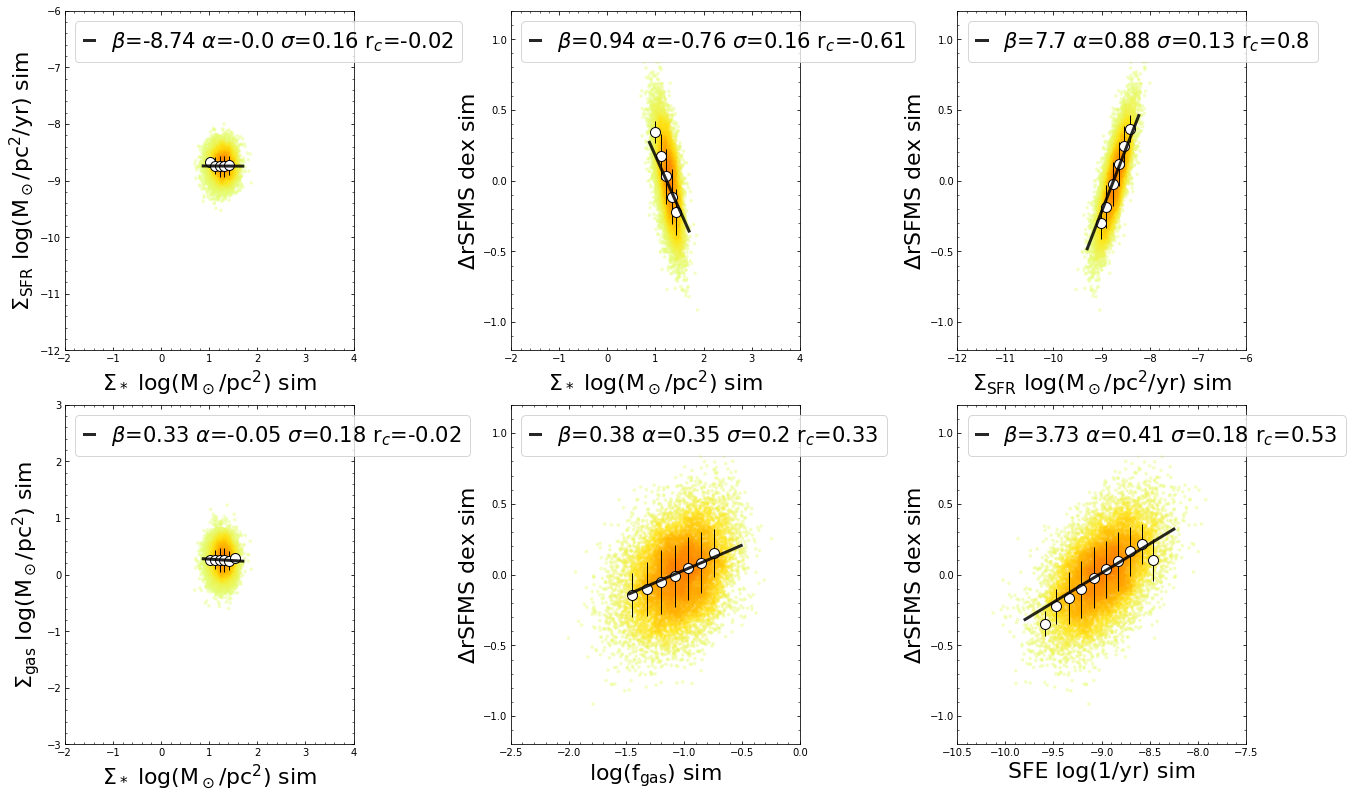

In [5]:
# Simulating relations and scales

#
# INPUT RELATIONS USED TO DEFINE THE DELTA
#
# WE SIMULATE A SINGLE POINT WITH X=1.35
#


n = 10000
a = 1.0
b = -10
a_g = 1.0
b_g = -1.0
e_x = 0.15
e_y = 0.20
#e_x = 0.20
#e_y = 0.20


#x = np.linspace(-1,3.5,n)
x_min_s=1.25
x_max_s=1.25
#
# Just one point
#
x = 1.25 #0.5*(x_max_s+x_min_s)+0.15*(x_max_s-x_min_s)*np.random.standard_normal(n)
y = a*x + b
x_gas = a_g*x+b_g
EW = 1.0 + 0.0*x

x = x + e_x*np.random.standard_normal(n)
y = y + e_y*np.random.standard_normal(n) #+ (a*e_x+b)*np.random.standard_normal(n) 
x_gas = x_gas + 1.5*e_x*np.random.standard_normal(n) #+ (a_g*e_x+b_g)*np.random.standard_normal(n) 


fig, ax = plt.subplots(2,3,figsize=(18.5,11))

######
pa1,ea1,s_y_par,s_dy_par,rc=my_scatter_single(ax[0][0],\
                                              x,\
                                              y,\
                                              EW,\
                                              -2,4,\
                                              -2-10,4-10,0.78-2,0.78+3,'',\
                                              '',-2,title='', fit_title='TW',\
                                             if_contour=0, if_bin=1, if_scatter=1, max_c=0.95,den_par_min=0.85)
x_min=np.min(x)
x_max=np.max(x)
x_plot=np.linspace(x_min+0.15*(x_max-x_min),x_max-0.15*(x_max-x_min),50)
y_plot=pa1[0]+pa1[1]*x_plot
fact=1.0
l_b=np.round(pa1[0],2)
l_a=np.round(pa1[1],2)
r_now=rc[0,1]
l_r=np.round(r_now,2)
l_s=np.round(s_dy_par*fact,2)
label=r'$\beta$='+str(l_b)+' '+r'$\alpha$='+str(l_a)+' '+r'$\sigma$='+str(l_s)+' '+r'r$_c$='+str(l_r)
p_fit, =ax[0][0].plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor ='black'  , color ='black', zorder=10,label=label,alpha=0.85)


#d_y = y- (pa1[0] + pa1[1]*x)
d_y = y- (a*x+b)

pa2,ea2,s_y_par2,s_dy_par2,rc2=my_scatter_single(ax[0][1],
                                                 x,\
                                              d_y,\
                                              EW,\
                                              -2,4,\
                                              -1.2,1.2,0.78-2,0.78+3,'',\
                                              '',-2,title='', fit_title='TW',\
                                             if_contour=0, if_bin=1, if_scatter=1, max_c=0.95,den_par_min=0.85)


######################
y_plot=pa2[0]+pa2[1]*x_plot
fact=1
l_b=np.round(pa2[0],2)
l_a=np.round(pa2[1],2)
r_now=rc2[0,1]
l_r=np.round(r_now,2)
l_s=np.round(s_dy_par2*fact,2)
label=r'$\beta$='+str(l_b)+' '+r'$\alpha$='+str(l_a)+' '+r'$\sigma$='+str(l_s)+' '+r'r$_c$='+str(l_r)
######################
p_fit, =ax[0][1].plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor ='black'  , color ='black', zorder=10,label=label,alpha=0.85)




pa2,ea2,s_y_par2,s_dy_par2,rc2=my_scatter_single(ax[0][2],
                                                 y,\
                                              d_y,\
                                              EW,\
                                              -2-10,4-10,\
                                              -1.2,1.2,0.78-2,0.78+3,'',\
                                              '',-2-10,title='', fit_title='TW',\
                                             if_contour=0, if_bin=1, if_scatter=1, max_c=0.95,den_par_min=0.85)

x_min=np.min(y)
x_max=np.max(y)
x_plot=np.linspace(x_min+0.15*(x_max-x_min),x_max-0.15*(x_max-x_min),50)
######################
y_plot=pa2[0]+pa2[1]*x_plot
fact=1
l_b=np.round(pa2[0],2)
l_a=np.round(pa2[1],2)
r_now=rc2[0,1]
l_r=np.round(r_now,2)
l_s=np.round(s_dy_par2*fact,2)
label=r'$\beta$='+str(l_b)+' '+r'$\alpha$='+str(l_a)+' '+r'$\sigma$='+str(l_s)+' '+r'r$_c$='+str(l_r)
######################
p_fit, =ax[0][2].plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor ='black'  , color ='black', zorder=10,label=label,alpha=0.85)




######
pa1,ea1,s_y_par,s_dy_par,rc=my_scatter_single(ax[1][0],\
                                              x,\
                                              x_gas,\
                                              EW,\
                                              -2,4,\
                                              -4+1,2+1,0.78-2,0.78+3,'',\
                                              '',-2,title='', fit_title='TW',\
                                             if_contour=0, if_bin=1, if_scatter=1, max_c=0.95,den_par_min=0.85)
x_min=np.min(x)
x_max=np.max(x)
x_plot=np.linspace(x_min+0.15*(x_max-x_min),x_max-0.15*(x_max-x_min),50)
y_plot=pa1[0]+pa1[1]*x_plot
fact=1.0
l_b=np.round(pa1[0],2)
l_a=np.round(pa1[1],2)
r_now=rc[0,1]
l_r=np.round(r_now,2)
l_s=np.round(s_dy_par*fact,2)
label=r'$\beta$='+str(l_b)+' '+r'$\alpha$='+str(l_a)+' '+r'$\sigma$='+str(l_s)+' '+r'r$_c$='+str(l_r)
p_fit, =ax[1][0].plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor ='black'  , color ='black', zorder=10,label=label,alpha=0.85)


#d_x_gas = x_gas- (pa1[0] + pa1[1]*x)
d_y = y- (a*x+b)
f_gas = 10**(x_gas)/(10**x_gas+10**x)
l_f_gas = np.log10(f_gas)
pa2,ea2,s_y_par2,s_dy_par2,rc2=my_scatter_single(ax[1][1],l_f_gas,d_y,\
                                                 EW,\
                                                 -3.5+1,0,\
                                                 -1.2,1.2,0.78-2,0.78+3,'',\
                                                 '',-3.5+1,title='', fit_title='TW',\
                                                 if_contour=0, if_bin=1, if_scatter=1,\
                                                 max_c=0.95,den_par_min=0.85)

#x_gas-x,\

x_min=np.min(l_f_gas)#x_gas-x)
x_max=np.max(l_f_gas)#
x_plot=np.linspace(x_min+0.3*(x_max-x_min),x_max-0.15*(x_max-x_min),50)
######################
y_plot=pa2[0]+pa2[1]*x_plot
fact=1
l_b=np.round(pa2[0],2)
l_a=np.round(pa2[1],2)
r_now=rc2[0,1]
l_r=np.round(r_now,2)
l_s=np.round(s_dy_par2*fact,2)
label=r'$\beta$='+str(l_b)+' '+r'$\alpha$='+str(l_a)+' '+r'$\sigma$='+str(l_s)+' '+r'r$_c$='+str(l_r)
######################
p_fit, =ax[1][1].plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor ='black'  , color ='black', zorder=10,label=label,alpha=0.85)



pa2,ea2,s_y_par2,s_dy_par2,rc2=my_scatter_single(ax[1][2],\
                                                 y-x_gas,d_y,\
                                                 EW,\
                                                 -9.5-1,-6.5-1,\
                                                 -1.2,1.2,0.78-2,0.78+3,'',\
                                                 '',-10-1,title='', fit_title='TW',\
                                                 if_contour=0, if_bin=1, if_scatter=1,\
                                                 max_c=0.95,den_par_min=0.85)



x_min=np.min(y-x_gas)
x_max=np.max(y-x_gas)
x_plot=np.linspace(x_min+0.15*(x_max-x_min),x_max-0.15*(x_max-x_min),50)
######################
y_plot=pa2[0]+pa2[1]*x_plot
fact=1
l_b=np.round(pa2[0],2)
l_a=np.round(pa2[1],2)
r_now=rc2[0,1]
l_r=np.round(r_now,2)
l_s=np.round(s_dy_par2*fact,2)
label=r'$\beta$='+str(l_b)+' '+r'$\alpha$='+str(l_a)+' '+r'$\sigma$='+str(l_s)+' '+r'r$_c$='+str(l_r)
######################
p_fit, =ax[1][2].plot(x_plot, y_plot, '-', linewidth = 3, markerfacecolor ='black'  , color ='black', zorder=10,label=label,alpha=0.85)


sS_Mst_label=r'$\Sigma_*$ log(M$_\odot$/pc$^2$) sim'
sS_Mgas_label=r'$\Sigma_{\rm gas}$ log(M$_\odot$/pc$^2$) sim'
sS_SFR_label=r'$\Sigma_{\rm SFR}$ log(M$_\odot$/pc$^2$/yr) sim'

sD_rSFMS_label=r'$\Delta$rSFMS dex sim' #log(M$_\odot$/pc$^2$/yr)'
sD_rMGMS_label=r'$\Delta$rMGMS dex sim' #log(M$_\odot$/pc$^2$)'
sD_rSK_label=r'$\Delta$rSK dex sim' #log(M$_\odot$/pc$^2$/yr)'

ax[0][0].set_xlabel(sS_Mst_label, fontsize=22)
ax[0][0].set_ylabel(sS_SFR_label, fontsize=22)
ax[0][1].set_xlabel(sS_Mst_label, fontsize=22)
ax[0][1].set_ylabel(sD_rSFMS_label, fontsize=22)
ax[0][2].set_xlabel(sS_SFR_label, fontsize=22)
ax[0][2].set_ylabel(sD_rSFMS_label, fontsize=22)
ax[1][0].set_xlabel(sS_Mst_label, fontsize=22)
ax[1][0].set_ylabel(sS_Mgas_label, fontsize=22)
ax[1][1].set_xlabel(r'log(f$_{\rm gas}$) sim', fontsize=22)
ax[1][1].set_ylabel(sD_rSFMS_label, fontsize=22)
ax[1][2].set_xlabel(r'SFE log(1/yr) sim', fontsize=22)
ax[1][2].set_ylabel(sD_rSFMS_label, fontsize=22)

#ax[0][0].set_xlabel('X', fontsize=22)
#ax[0][0].set_ylabel('Y', fontsize=22)
#ax[0][1].set_xlabel('X', fontsize=22)
#ax[0][1].set_ylabel(r'$\Delta$Y', fontsize=22)
#ax[0][2].set_xlabel('Y', fontsize=22)
#ax[0][2].set_ylabel(r'$\Delta$Y', fontsize=22)
#ax[1][0].set_xlabel('X', fontsize=22)
#ax[1][0].set_ylabel(r"X'", fontsize=22)
#ax[1][1].set_xlabel(r"X'-X", fontsize=22)
#ax[1][1].set_ylabel(r'$\Delta$Y', fontsize=22)
#ax[1][2].set_xlabel(r"Y-X'", fontsize=22)
#ax[1][2].set_ylabel(r'$\Delta$Y', fontsize=22)



for i,ax_now in enumerate(ax.flat):
    #print (i)
    ax_now.minorticks_on()
    ax_now.xaxis.set_ticks_position('both')
    ax_now.yaxis.set_ticks_position('both')
    ax_now.tick_params(which='both',direction="in")
    ax_now.spines['right'].set_visible(True);
    ax_now.spines['top'].set_visible(True)
    ax_now.legend(loc='upper left', handlelength=0.5, frameon='True',\
                           columnspacing=0.3, fontsize=21)#, bbox_to_anchor=(0.01, 0.5, 0.15, 0.5    
#fig.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95, wspace=0, hspace=0) 
fig.tight_layout(pad=0.4)
#fig.colorbar()
#cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
#cbar = fig.colorbar(cax=cb_ax)

fig.savefig("sim_test_fixed_point.pdf", transparent=False, facecolor='white', CALcolor='white')#.pdf")


